## KMEANS

## READ DATASET


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Gender', 'Workout_Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364.0,2,10.0,3.5,4,3,28.77
969,25,1,66.6,1.61,184,166,56,1.38,1260.0,2,25.0,3.0,2,1,25.69
970,59,0,60.4,1.76,194,120,53,1.72,929.0,0,18.8,2.7,5,3,19.50
971,32,1,126.4,1.83,198,146,62,1.10,883.0,1,28.2,2.1,3,2,37.74


In [5]:
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

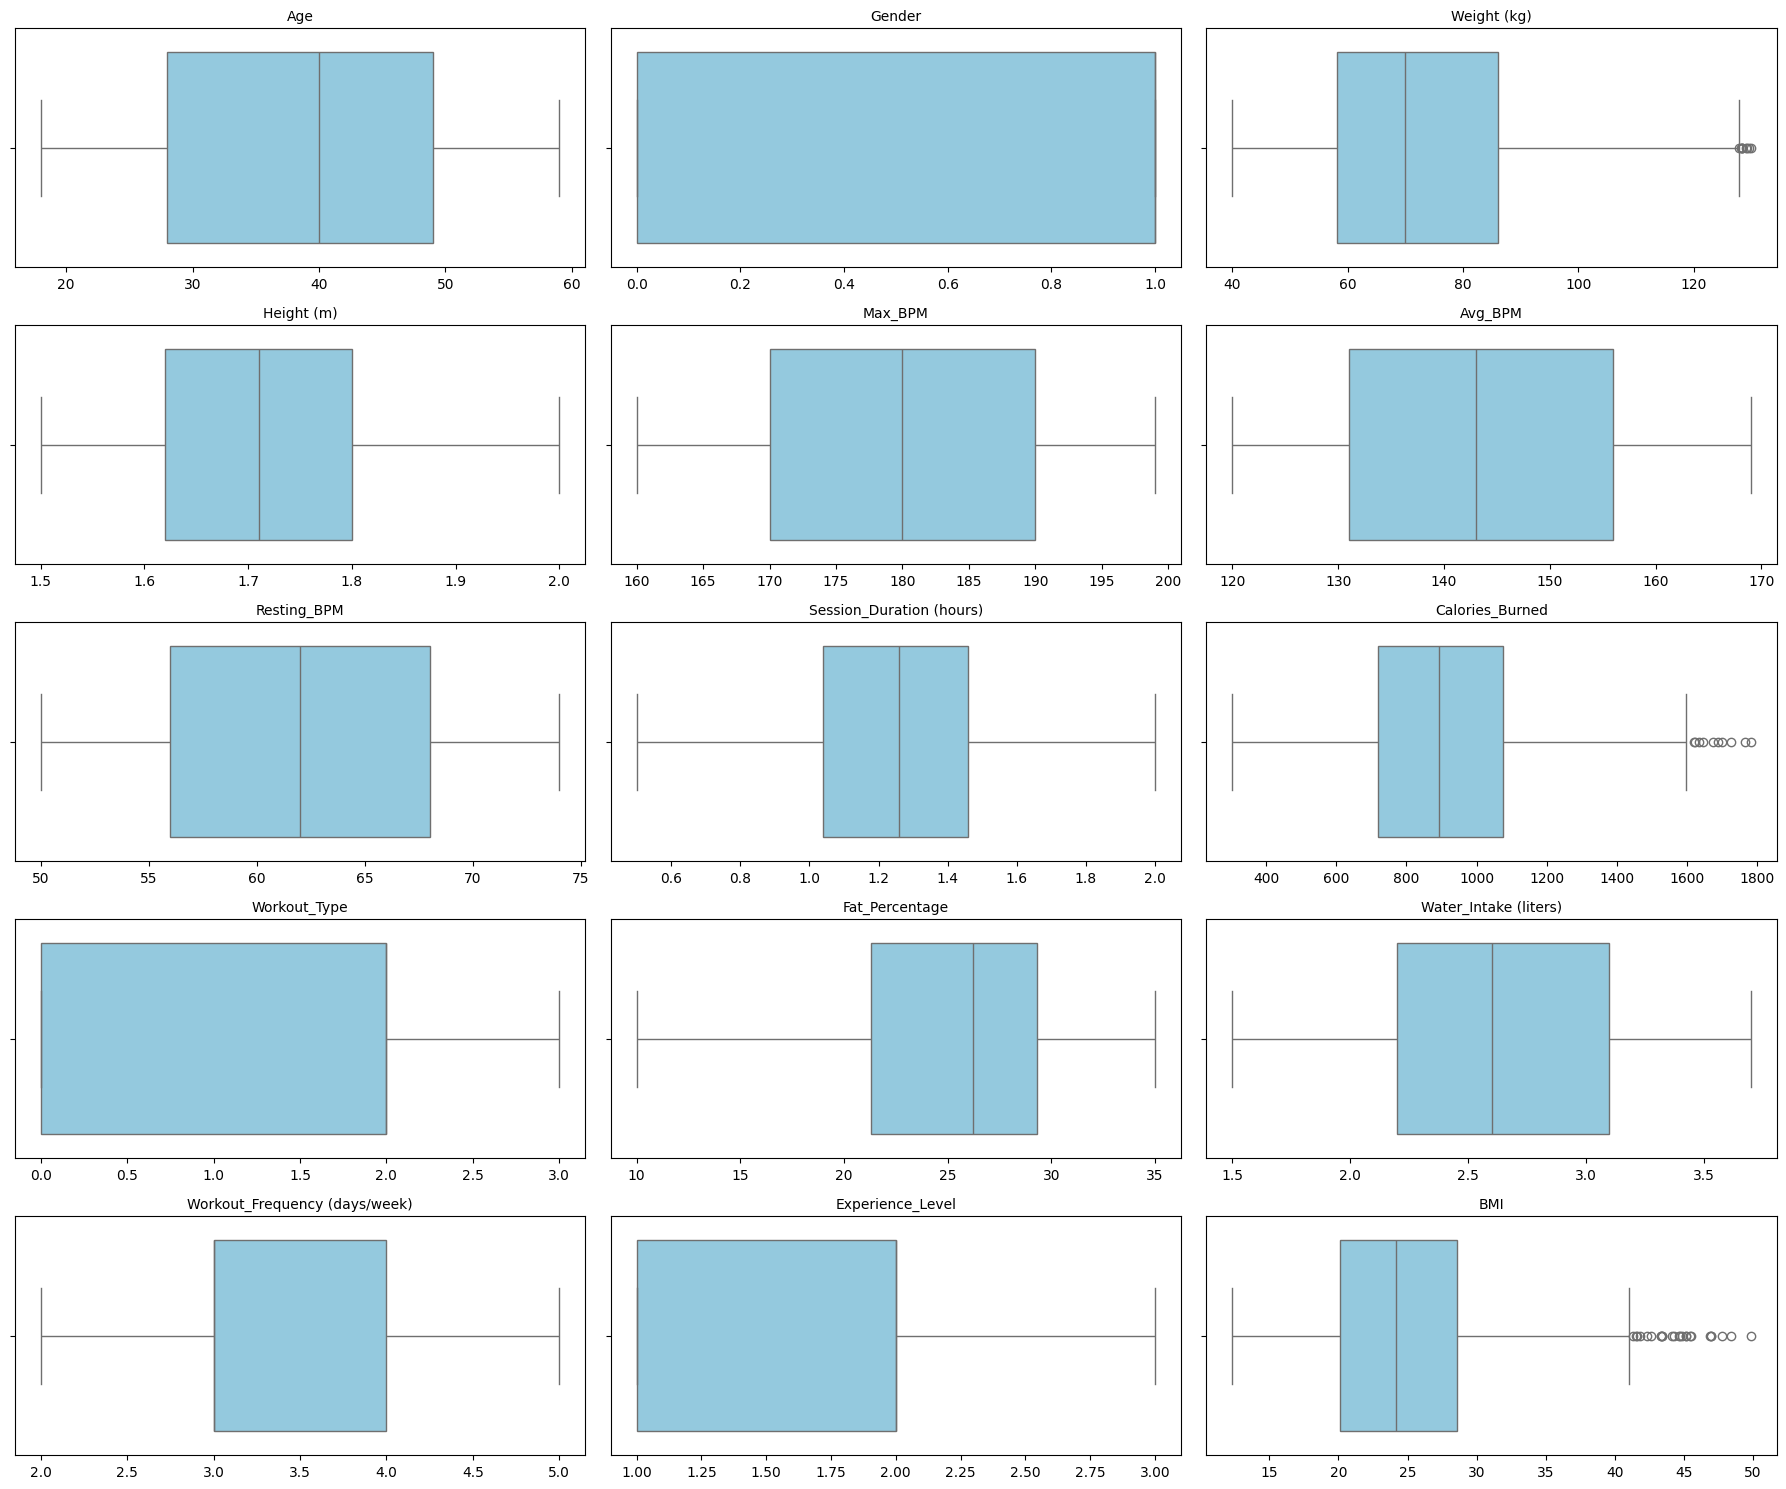

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
num_columns = len(kolom_numerik)
num_cols = 3
num_rows = (num_columns + num_cols - 1) // num_cols

plt.figure(figsize=(18, num_rows * 3))
for i, column in enumerate(kolom_numerik, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], orient='h', color='skyblue')
    plt.title(column, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
def bersihkan_outlier(df, kolom, metode='zscore', threshold=3):
    if metode == 'zscore':
        # Metode Z-score
        z_scores = np.abs((df[kolom] - df[kolom].mean()) / df[kolom].std())
        return df[z_scores < threshold]

    elif metode == 'iqr':
        # Metode IQR (Interquartile Range)
        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1

        batas_bawah = Q1 - threshold * IQR
        batas_atas = Q3 + threshold * IQR

        return df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]

df = bersihkan_outlier(df, kolom_numerik, metode='zscore', threshold=2)
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


Beberapa saran untuk mengatasi masalah outlier yang persisten:
Gunakan threshold yang lebih ketat:
Z-score: turunkan dari 3 menjadi 2.5 atau 2
IQR: turunkan dari 1.5 menjadi 1.3 atau 1

<Figure size 1500x1000 with 0 Axes>

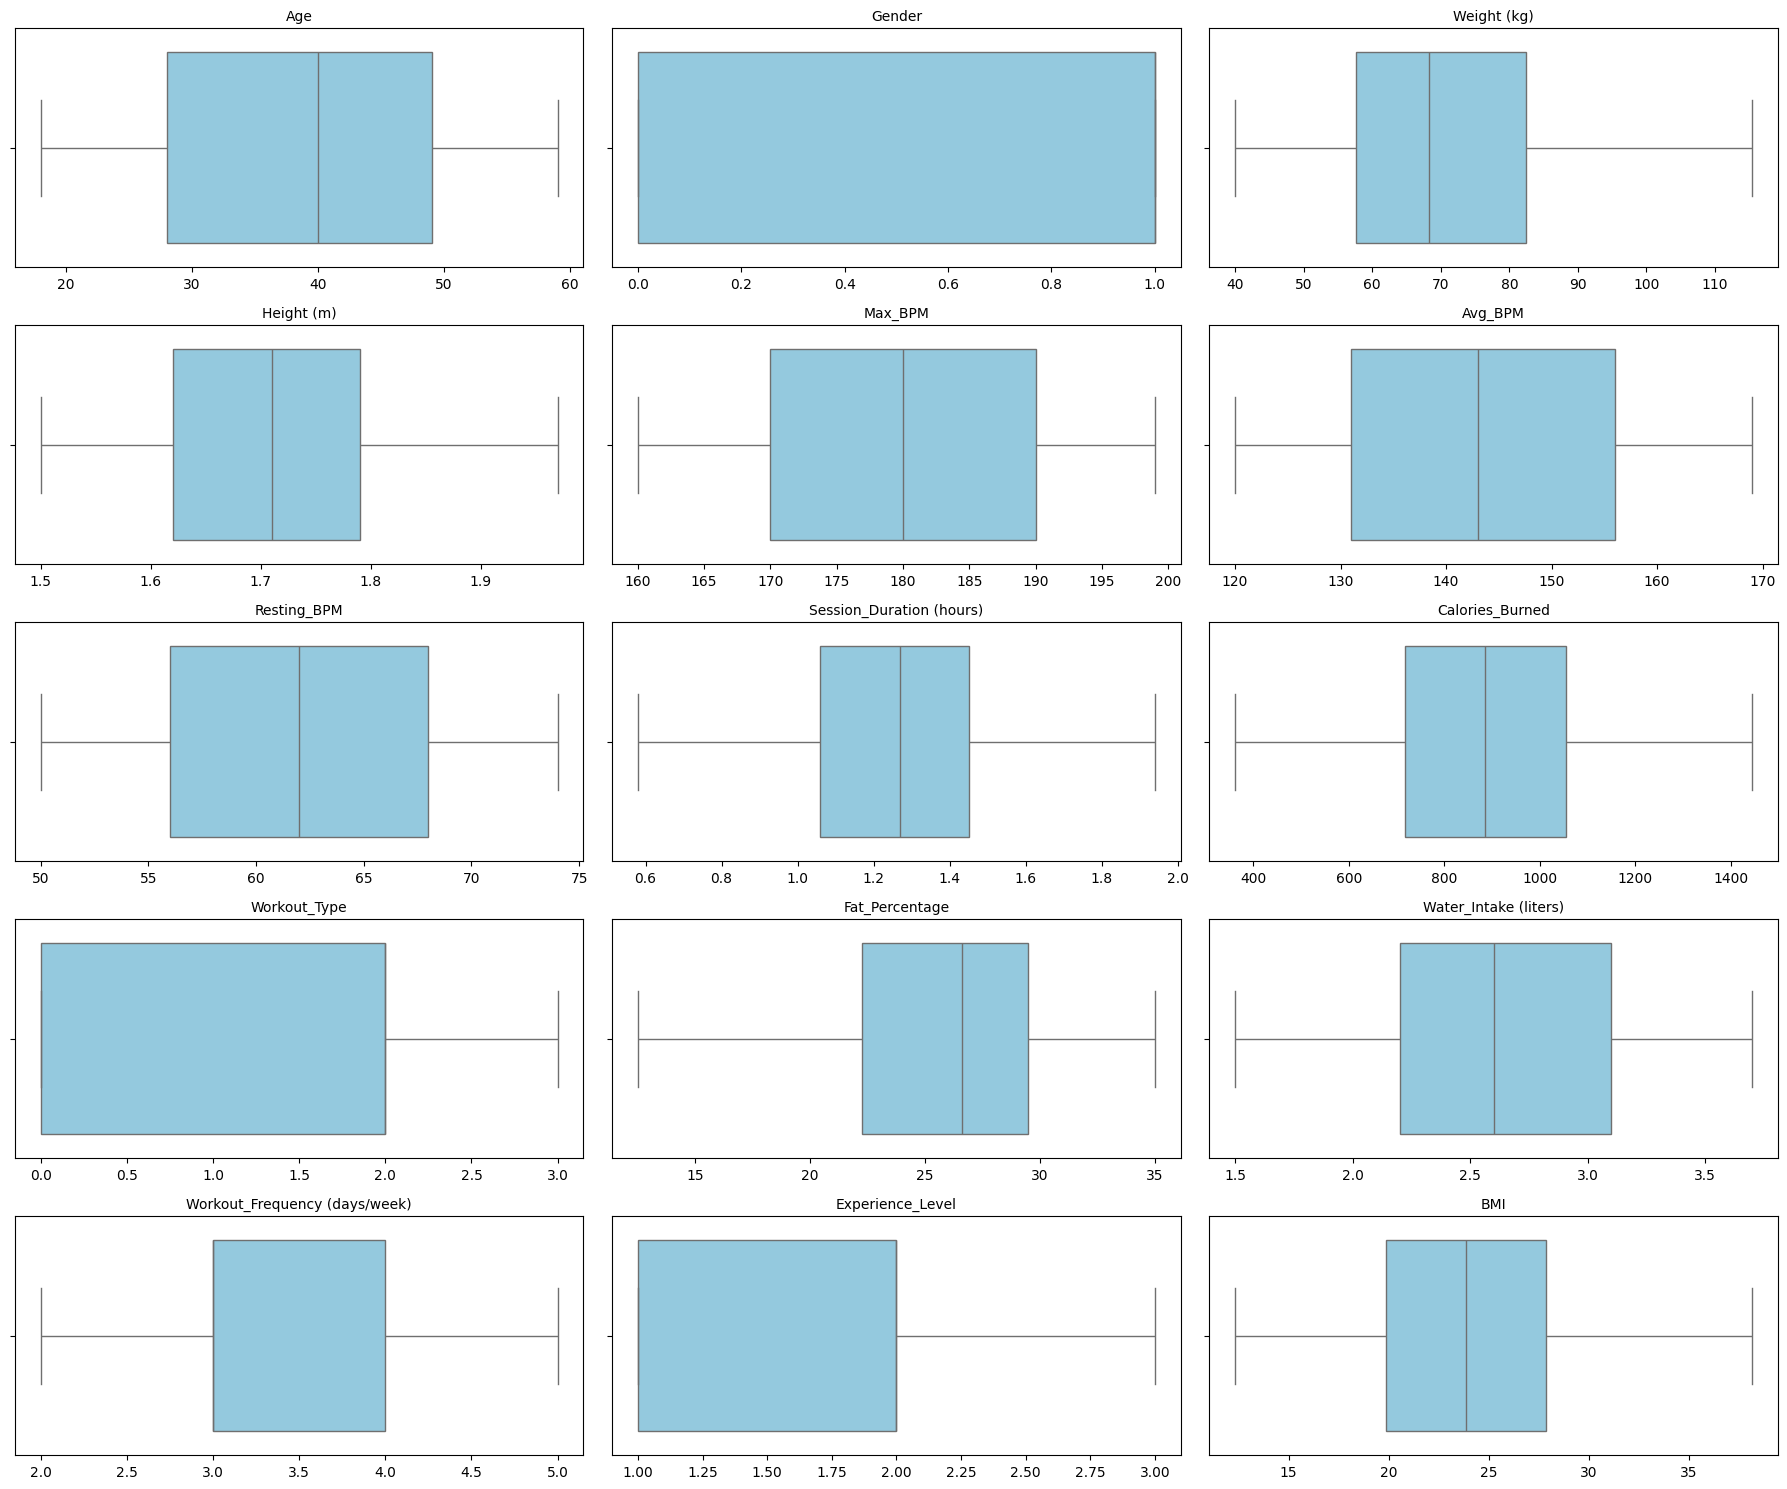

In [8]:
plt.figure(figsize=(15, 10))
num_columns = len(kolom_numerik)
num_cols = 3
num_rows = (num_columns + num_cols - 1) // num_cols

plt.figure(figsize=(18, num_rows * 3))
for i, column in enumerate(kolom_numerik, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], orient='h', color='skyblue')
    plt.title(column, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [9]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()


Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [10]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

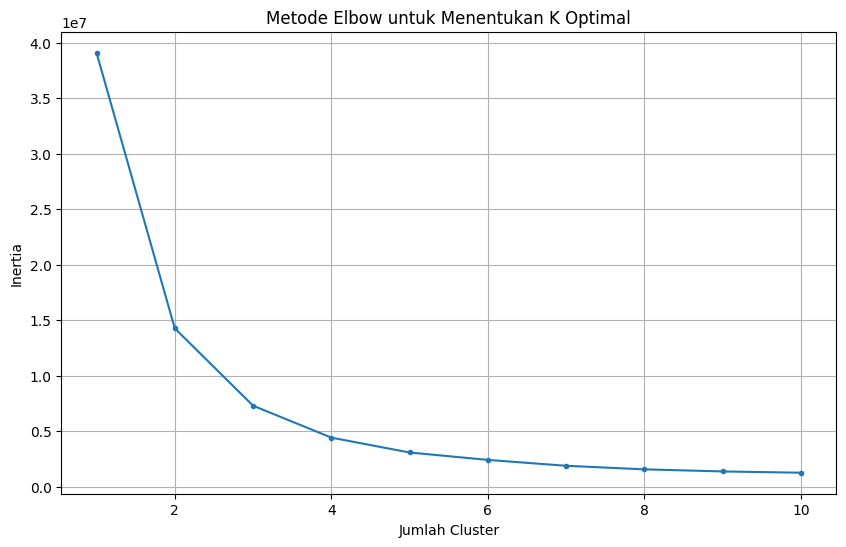

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='.')
plt.grid(True)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=42)

In [13]:
df_cluster = df.copy()
df_cluster['Cluster'] = kmeans.labels_
df_cluster.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Cluster
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20,1
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00,1
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71,0
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41,0
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39,0


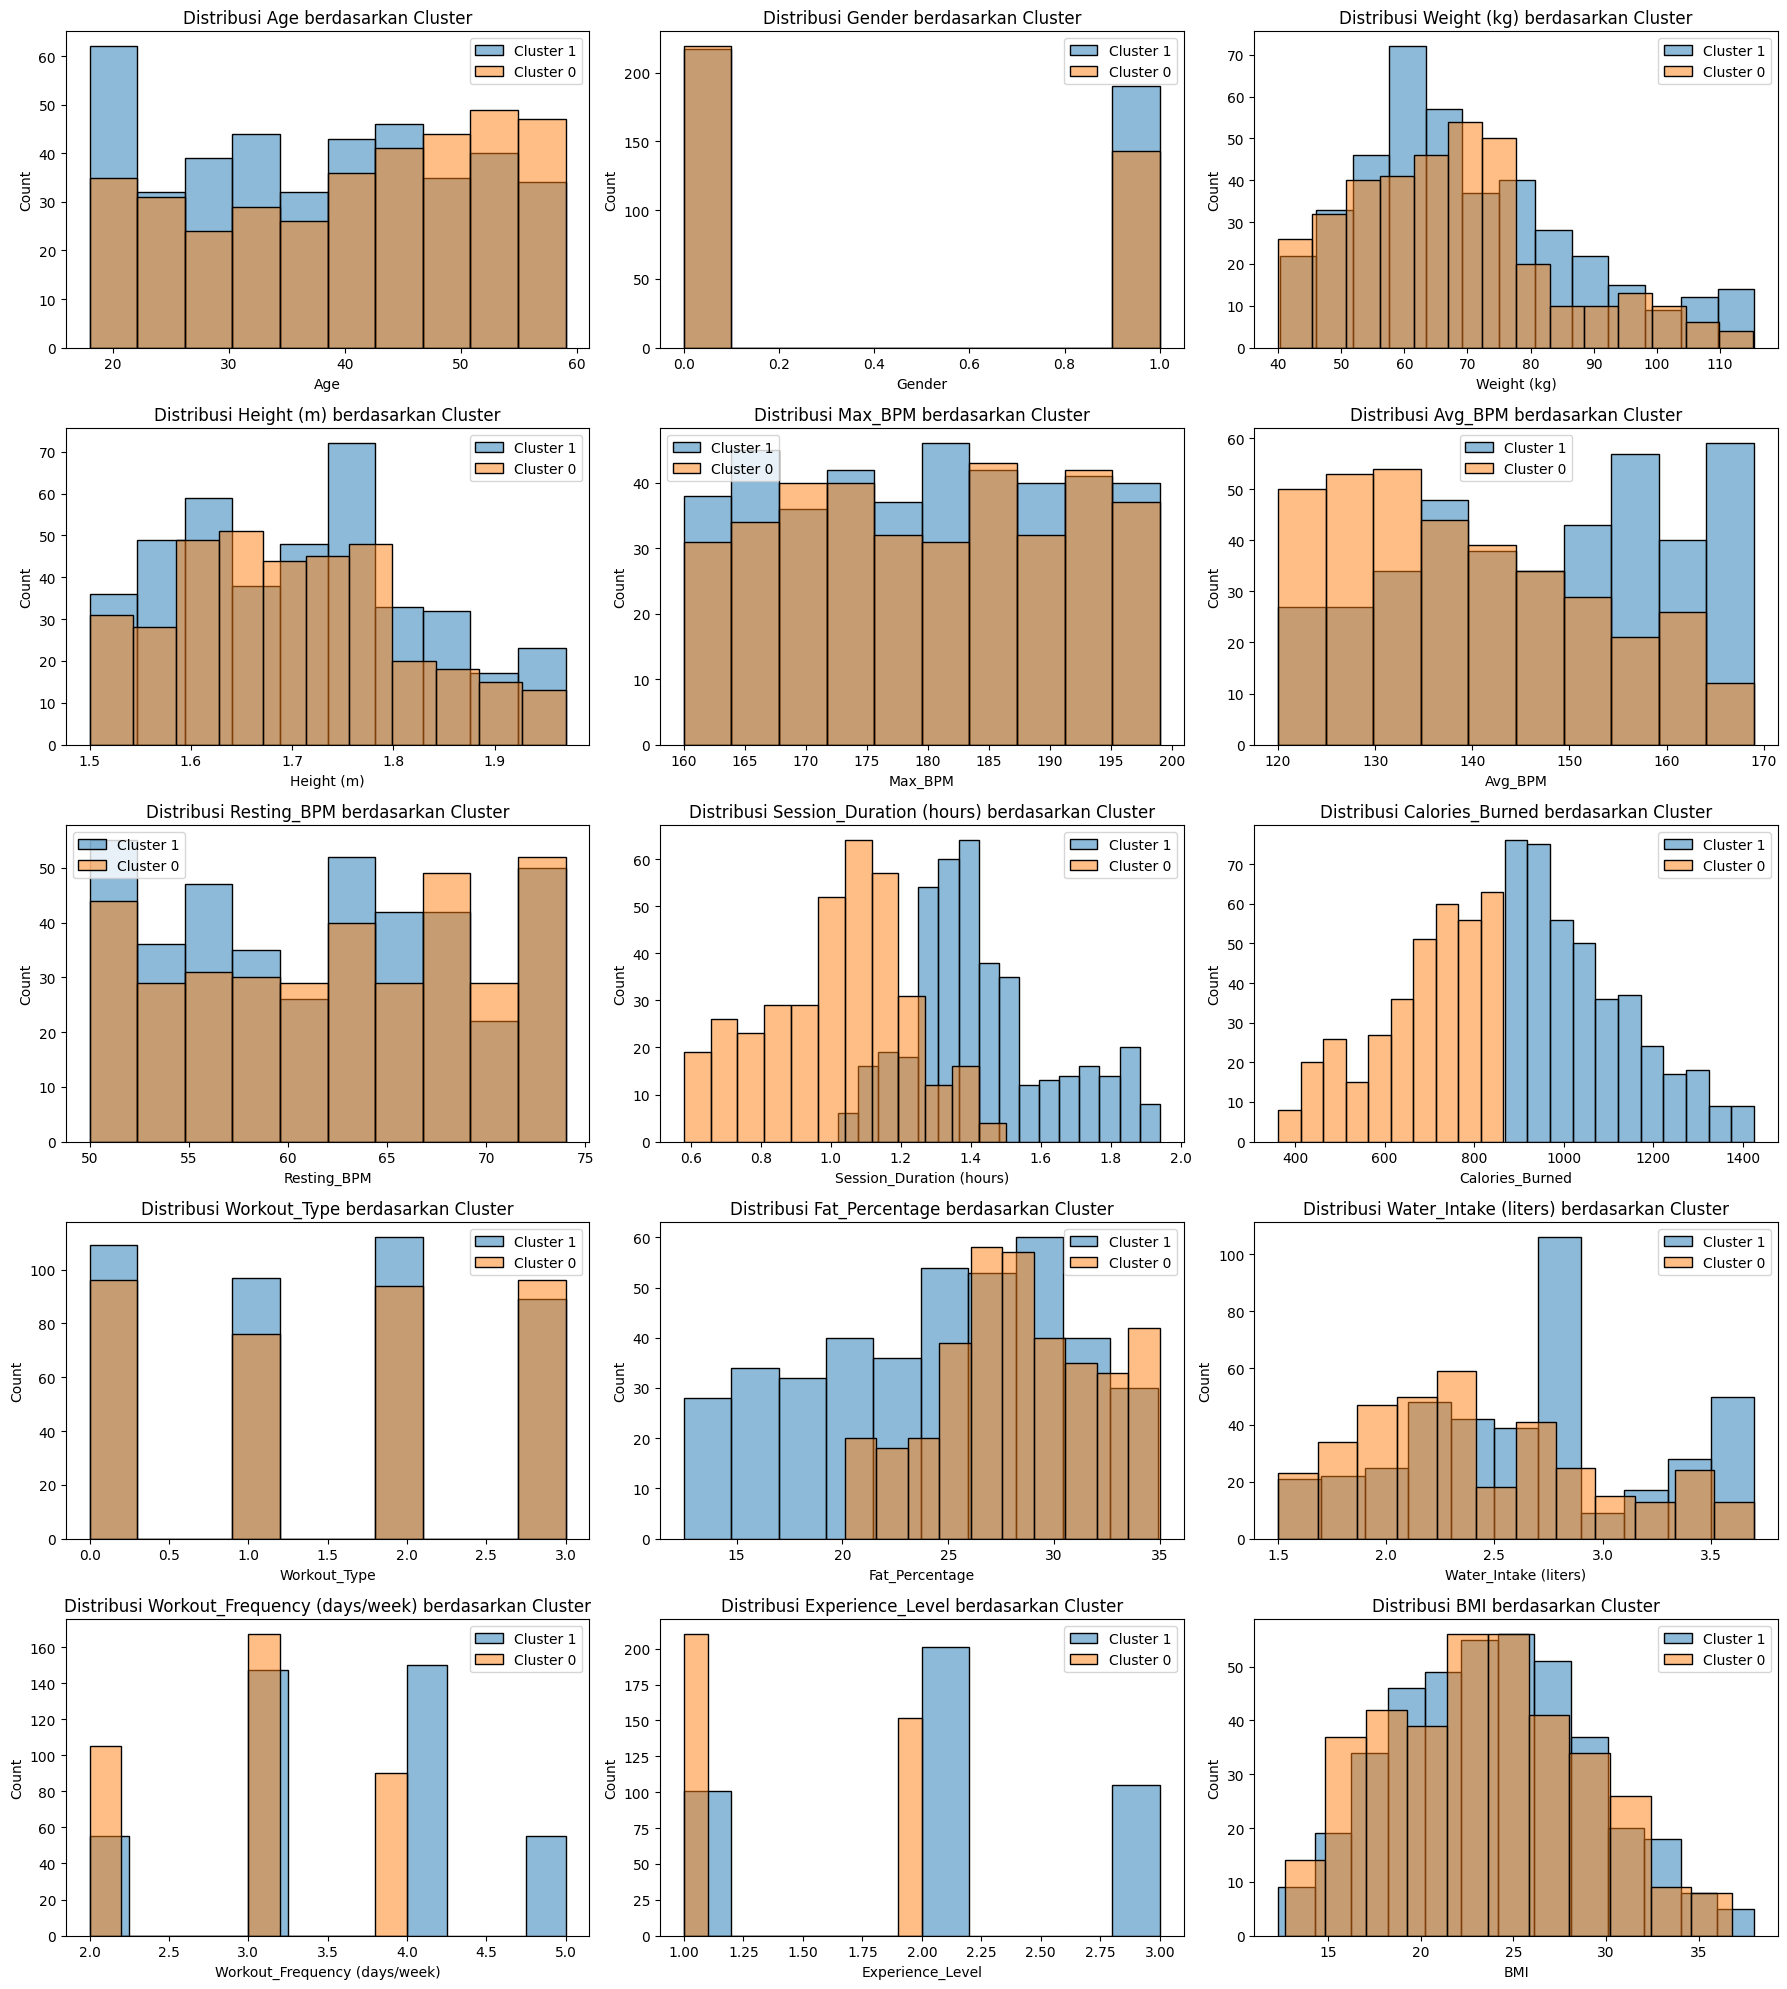

In [14]:
# Tentukan jumlah kolom dan baris untuk subplot
num_cols = 3  # Misalnya, 3 kolom
num_rows = (len(df.columns) + num_cols - 1) // num_cols  # Hitung jumlah baris yang diperlukan

# Buat figure dan axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

# Flatten axes array untuk iterasi yang lebih mudah
axes = axes.flatten()

# Iterasi melalui setiap kolom dan buat histogram
for i, kolom in enumerate(df.columns):
    for cluster in df_cluster['Cluster'].unique():
        sns.histplot(data=df_cluster[df_cluster['Cluster'] == cluster],
                     x=kolom,
                     label=f'Cluster {cluster}',
                     alpha=0.5,
                     ax=axes[i])
    axes[i].set_title(f'Distribusi {kolom} berdasarkan Cluster')
    axes[i].legend()

# Hapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

beberapa insight yang dapat diambil:
1. Distribusi Usia (Age):
* Cluster 0 memiliki distribusi usia yang lebih muda, dengan mayoritas anggota berusia 20-40 tahun
* Cluster 1 cenderung memiliki anggota yang lebih tua, dengan distribusi usia yang lebih merata antara 30-60 tahun
2. Berat Badan (Weight):
* Cluster 0 memiliki distribusi berat badan yang lebih rendah (40-70 kg)
* Cluster 1 memiliki distribusi berat badan yang lebih tinggi (70-100 kg)
3. Tinggi Badan (Height):
* Tidak ada perbedaan yang signifikan dalam distribusi tinggi badan antar cluster
* Kedua cluster memiliki rentang tinggi badan yang mirip
4. Detak Jantung (Max_BPM, Avg_BPM, Resting_BPM):
* Cluster 0 cenderung memiliki detak jantung maksimum dan rata-rata yang lebih tinggi
* Cluster 1 memiliki detak jantung istirahat yang lebih rendah
5. Durasi Latihan (Session_Duration):
* Cluster 0 cenderung memiliki durasi latihan yang lebih pendek
* Cluster 1 memiliki variasi durasi latihan yang lebih besar
6. Kalori Terbakar (Calories_Burned):
* Cluster 1 memiliki rata-rata pembakaran kalori yang lebih tinggi
* Cluster 0 memiliki pembakaran kalori yang lebih rendah dan konsisten
7. Persentase Lemak (Fat_Percentage):
* Cluster 0 memiliki persentase lemak yang lebih rendah
* Cluster 1 memiliki persentase lemak yang lebih tinggi
8. Asupan Air (Water_Intake):
* Cluster 1 memiliki asupan air yang lebih tinggi
* Cluster 0 memiliki asupan air yang lebih rendah
9. Frekuensi Latihan (Workout_Frequency):
* Tidak ada perbedaan yang sangat signifikan dalam frekuensi latihan antar cluster
* Kedua cluster memiliki distribusi yang mirip
10 Level Pengalaman (Experience_Level):
* Cluster 0 cenderung memiliki level pengalaman yang lebih rendah
* Cluster 1 memiliki variasi level pengalaman yang lebih tinggi
11. BMI:
* Cluster 0 memiliki BMI yang lebih rendah dan normal
* Cluster 1 memiliki BMI yang lebih tinggi, menunjukkan kecenderungan kelebihan berat badan
12. Kesimpulan Umum:
* Cluster 0 cenderung mewakili kelompok yang lebih muda, lebih ringan, dengan intensitas latihan yang lebih tinggi tapi durasi lebih pendek
* Cluster 1 mewakili kelompok yang lebih tua, lebih berat, dengan durasi latihan yang lebih bervariasi dan pembakaran kalori yang lebih tinggi
13. Insight ini dapat digunakan untuk:
* Menyesuaikan program latihan berdasarkan karakteristik masing-masing cluster
* Merancang strategi nutrisi dan hidrasi yang sesuai
* Mengembangkan program pembinaan yang lebih personal berdasarkan level pengalaman
* Menetapkan target yang realistis berdasarkan profil masing-masing cluster

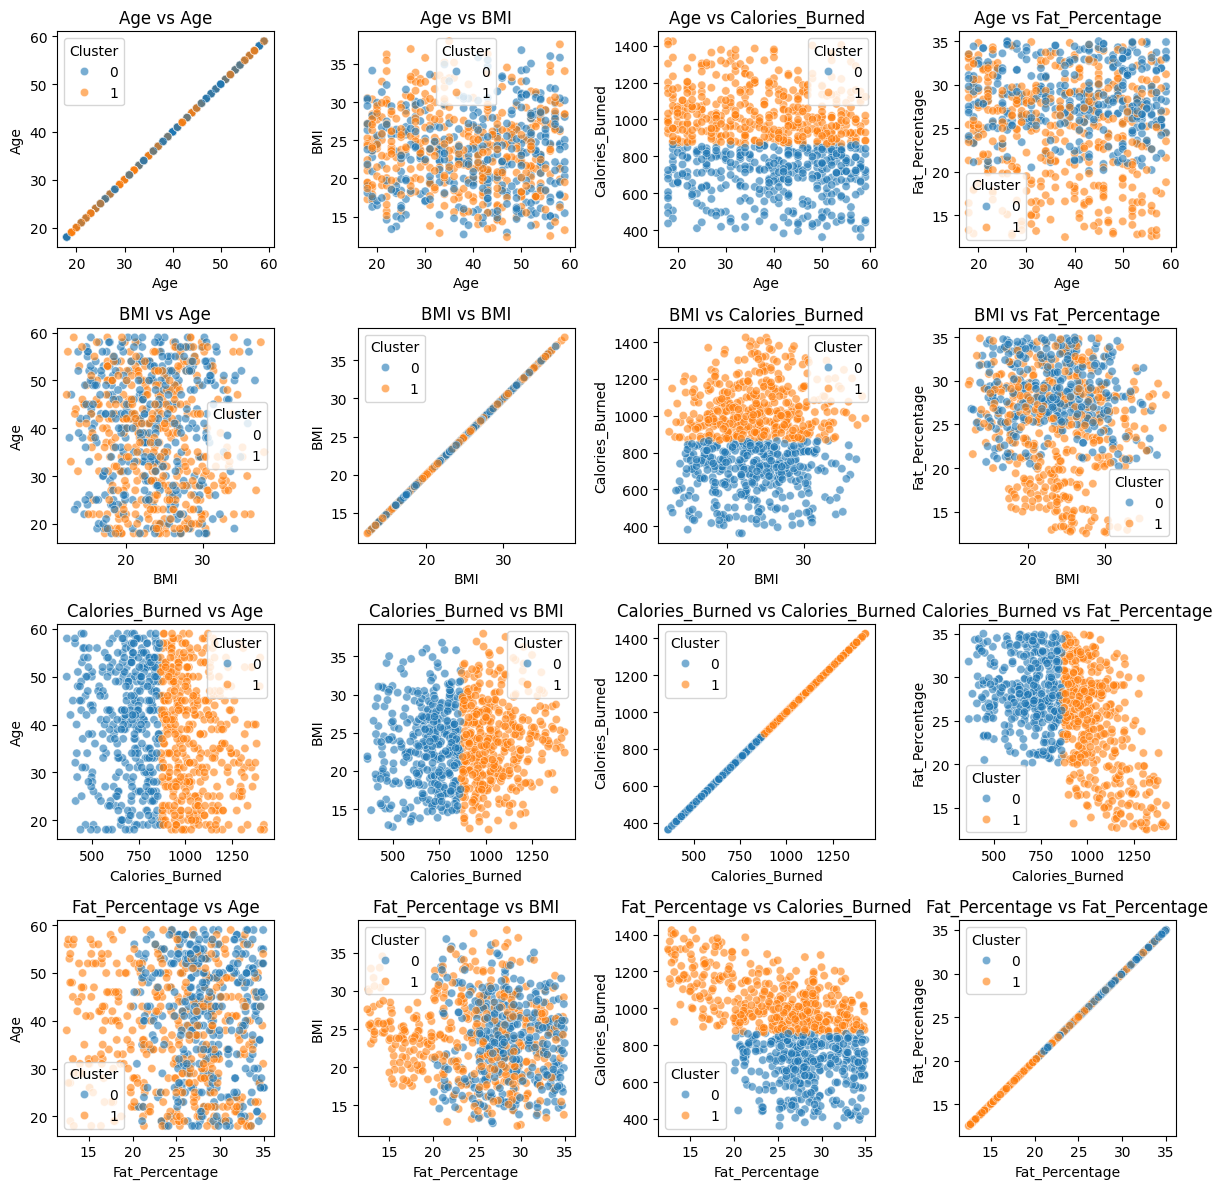

In [15]:
kolom_penting = ['Age', 'BMI', 'Calories_Burned', 'Fat_Percentage']

plt.figure(figsize=(12, 12))
for i, col1 in enumerate(kolom_penting):
    for j, col2 in enumerate(kolom_penting):
        plt.subplot(len(kolom_penting), len(kolom_penting), i*len(kolom_penting) + j + 1)
        sns.scatterplot(data=df_cluster, x=col1, y=col2, hue='Cluster', alpha=0.6)
        plt.title(f'{col1} vs {col2}')

plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [17]:
pca = PCA(n_components=3)
pca_df = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = kmeans.labels_
pca_df.head()

,PC1,PC2,PC3,Cluster
0,436.271902,15.479098,12.140409,1
1,6.023912,5.681363,11.061538,1
2,-200.508014,3.756738,-15.546123,0
3,-344.473135,-15.488296,15.703766,0
4,-320.801011,-24.103245,13.356468,0


<Axes: xlabel='PC1', ylabel='PC2'>

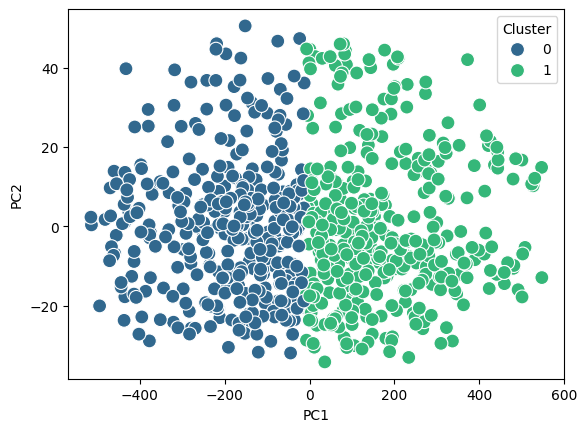

In [18]:
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100)

In [19]:
siluet_skor = silhouette_score(df, kmeans.labels_)
print('Silhouette Score: ', siluet_skor)

Silhouette Score:  0.5244732669093549


## KMEANS TUNNING

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters' : range(2,8),
    'init' : ['k-means++'],
    'n_init' : ['auto'],
    'max_iter' : [100,300,500],
}

In [21]:
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid)
grid_search.fit(df)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++'], 'max_iter': [100, 300, 500],
                         'n_clusters': range(2, 8), 'n_init': ['auto']})

In [22]:
best_score = -1
best_params = None

for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(df)
    score = silhouette_score(df, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 'auto'}
Best Silhouette Score: 0.5244732669093549


# DEPLOYMENT

In [23]:
!pip install streamlit


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install pyngrok


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!ngrok authtoken add-authtoken 2qNCmn5odDNsnD9ZUyJugWFafgH_4TPJ6MxAY2McQScUJ4wSU # ganti token sebelum run

authtoken - 

USAGE:
  ngrok authtoken TOKEN [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain
  ngrok http 80 --cidr-allow 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions
  Upgrade your account at https://dashboar


ERROR:  accepts 1 arg(s), received 7


In [26]:
# Import yang diperlukan
import pickle
# Simpan model KMeans
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [27]:
%%writefile app_kmeans.py

import streamlit as st
import pandas as pd
import pickle
import numpy as np

# Load data training untuk validasi range input
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Load model KMeans
with open('kmeans_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Judul aplikasi
st.title('Gym Member Clustering Prediction Kelompok 6')
st.write('Aplikasi ini membantu memprediksi cluster member gym berdasarkan karakteristik mereka')

# Form input dengan validasi range
st.header('Input Karakteristik Member')

col1, col2 = st.columns(2)

with col1:
    age = st.number_input('Age',
                         min_value=int(df['Age'].min()),
                         max_value=int(df['Age'].max()),
                         value=int(df['Age'].mean()))

    gender = st.selectbox('Gender', ['Male', 'Female'])

    weight = st.number_input('Weight (kg)',
                           min_value=float(df['Weight (kg)'].min()),
                           max_value=float(df['Weight (kg)'].max()),
                           value=float(df['Weight (kg)'].mean()))

    height = st.number_input('Height (m)',
                           min_value=float(df['Height (m)'].min()),
                           max_value=float(df['Height (m)'].max()),
                           value=float(df['Height (m)'].mean()))

    max_bpm = st.number_input('Max BPM',
                             min_value=int(df['Max_BPM'].min()),
                             max_value=int(df['Max_BPM'].max()),
                             value=int(df['Max_BPM'].mean()))

    avg_bpm = st.number_input('Average BPM',
                             min_value=int(df['Avg_BPM'].min()),
                             max_value=int(df['Avg_BPM'].max()),
                             value=int(df['Avg_BPM'].mean()))

    resting_bpm = st.number_input('Resting BPM',
                                 min_value=int(df['Resting_BPM'].min()),
                                 max_value=int(df['Resting_BPM'].max()),
                                 value=int(df['Resting_BPM'].mean()))

with col2:
    session_duration = st.number_input('Session Duration (hours)',
                                     min_value=float(df['Session_Duration (hours)'].min()),
                                     max_value=float(df['Session_Duration (hours)'].max()),
                                     value=float(df['Session_Duration (hours)'].mean()))

    calories_burned = st.number_input('Calories Burned',
                                    min_value=float(df['Calories_Burned'].min()),
                                    max_value=float(df['Calories_Burned'].max()),
                                    value=float(df['Calories_Burned'].mean()))

    workout_type = st.selectbox('Workout Type', ['Cardio', 'Strength', 'HIIT', 'Yoga'])

    fat_percentage = st.number_input('Fat Percentage',
                                   min_value=float(df['Fat_Percentage'].min()),
                                   max_value=float(df['Fat_Percentage'].max()),
                                   value=float(df['Fat_Percentage'].mean()))

    water_intake = st.number_input('Water Intake (liters)',
                                 min_value=float(df['Water_Intake (liters)'].min()),
                                 max_value=float(df['Water_Intake (liters)'].max()),
                                 value=float(df['Water_Intake (liters)'].mean()))

    workout_frequency = st.slider('Workout Frequency (days/week)',
                                min_value=int(df['Workout_Frequency (days/week)'].min()),
                                max_value=int(df['Workout_Frequency (days/week)'].max()),
                                value=int(df['Workout_Frequency (days/week)'].mean()))

    experience_level = st.selectbox('Experience Level', [1, 2, 3],
                                  help='1: Beginner, 2: Intermediate, 3: Advanced')

    bmi = st.number_input('BMI',
                         min_value=float(df['BMI'].min()),
                         max_value=float(df['BMI'].max()),
                         value=float(df['BMI'].mean()))

# Encode categorical variables
gender_encoded = 1 if gender == 'Male' else 0
workout_type_mapping = {'Cardio': 0, 'Strength': 1, 'HIIT': 2, 'Yoga': 3}
workout_type_encoded = workout_type_mapping[workout_type]

# Tombol prediksi
if st.button('Predict Cluster'):
    try:
        # Siapkan data untuk prediksi
        input_data = np.array([[
            age, gender_encoded, weight, height, max_bpm, avg_bpm,
            resting_bpm, session_duration, calories_burned, workout_type_encoded,
            fat_percentage, water_intake, workout_frequency, experience_level, bmi
        ]])

        # Lakukan prediksi
        cluster = model.predict(input_data)[0]

        # Tampilkan hasil
        st.header('Hasil Prediksi')

        if cluster == 0:
            st.success('Member termasuk dalam Cluster 1: Member Aktif')
            st.write("""
            Karakteristik Member Aktif:
            - Memiliki rata-rata kalori terbakar lebih tinggi
            - Durasi latihan lebih lama
            - Heart rate (BPM) lebih tinggi
            - Tingkat pengalaman lebih tinggi
            - Frekuensi latihan lebih sering

            Rekomendasi:
            - Pertahankan program latihan intensif
            - Berikan tantangan baru
            - Fokus pada peningkatan performa
            """)
        else:
            st.warning('Member termasuk dalam Cluster 2: Member Kurang Aktif')
            st.write("""
            Karakteristik Member Kurang Aktif:
            - Kalori terbakar lebih rendah
            - Durasi latihan lebih pendek
            - Heart rate lebih rendah
            - Tingkat pengalaman pemula
            - Frekuensi latihan lebih jarang

            Rekomendasi:
            - Berikan program latihan bertahap
            - Pendampingan lebih intensif
            - Fokus pada peningkatan motivasi
            """)

    except Exception as e:
        st.error(f'Terjadi kesalahan dalam prediksi: {str(e)}')

# Bagian Debug Info yang sebelumnya ada di Sidebar sekarang dipindahkan ke bawah halaman utama
st.header('Cluster Distribution')
if st.checkbox('Show Cluster Distribution'):
    try:
        cluster_dist = pd.Series(model.labels_).value_counts()
        st.bar_chart(cluster_dist)
        st.write('Cluster Centers:', model.cluster_centers_)
    except Exception as e:
        st.error(f'Terjadi kesalahan dalam menampilkan distribusi cluster: {str(e)}')


Overwriting app_kmeans.py


In [ ]:
from pyngrok import ngrok
import threading
import os

def run_streamlit():
  os.system("streamlit run app_kmeans.py --server.port 8501")

thread = threading.Thread(target=run_streamlit)
thread.start()

# Configure pyngrok to use your authtoken
ngrok.set_auth_token("2qNCmn5odDNsnD9ZUyJugWFafgH_4TPJ6MxAY2McQScUJ4wSU")  # ganti token sebelum run


public_url = ngrok.connect(addr="8501")
print(f"Streamlit app is live at: {public_url}")